In [1]:
import face_recognition
import os
import cv2
import numpy as np
import requests
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random
from datetime import date
url = "http://192.168.43.1:8080/shot.jpg"

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:blue;">          
           
1. Face Recognition using image folder data and webcam

In [2]:
### get all images from image folder 
known_face_names = []
face_names = os.listdir("./image")
for face in face_names:
    known_face_names.append(face.split(".")[0])

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.


known_face_encodings = []

for file in known_face_names:
    person_image = face_recognition.load_image_file("./image/"+file+".jpg")
    known_face_encodings.append(face_recognition.face_encodings(person_image)[0])


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.250, fy=0.250)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()


<DOCTYPE html>
<html>
    <body>
        <h1 style="color:blue;">          
            2. Android WebCam on Cv2 Object

In [3]:
while True:
    url = "http://192.168.43.1:8080/shot.jpg"
    page = requests.get(url)
    img_arr = np.array(bytearray(page.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    cv2.imshow("Android WebCam", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:blue;">          
            3. Face Recognition using image folder data and Android Camera

In [4]:
import face_recognition
import os
import cv2
import numpy as np

### get all images from image folder 
known_face_names = []
face_names = os.listdir("./image")
for face in face_names:
    known_face_names.append(face.split(".")[0])

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.


known_face_encodings = []

for file in known_face_names:
    person_image = face_recognition.load_image_file("./image/"+file+".jpg")
    known_face_encodings.append(face_recognition.face_encodings(person_image)[0])


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ##### ret, frame = video_capture.read()
    
    
    page = requests.get(url)
    img_arr = np.array(bytearray(page.content), dtype=np.uint8)
    frame = cv2.imdecode(img_arr, -1)
    


    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.250, fy=0.250)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
          

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:blue;">
            4. Take Snap and save into current folder

I found 1 face(s) in this photograph.


C:\Users\RAhul\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


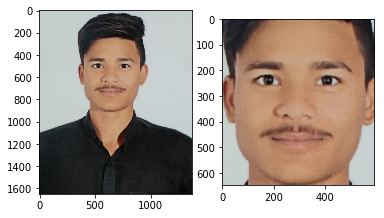

In [9]:
import face_recognition
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()

while True:
    url = "http://192.168.43.1:8080/shot.jpg"
    page = requests.get(url)
    img_arr = np.array(bytearray(page.content), dtype=np.uint8)
    cam_image = cv2.imdecode(img_arr,-1)
    face_locations = face_recognition.face_locations(cam_image)

    print("I found {} face(s) in this photograph.".format(len(face_locations)))
    face_image = ""
    for face_location in face_locations:

        # Print the location of each face in this image
        top, right, bottom, left = face_location

        # You can access the actual face itself like this:
        face_image = cam_image[top:bottom, left:right]
        
        
    if face_image != "":
        break
cv2.imwrite("Unknow_face.jpg",face_image)    
cv2.imwrite("Unknow_person.jpg",cam_image)
#plt.imshow(face_image)

fig=plt.figure()
fig.add_subplot(1,2,1)
face_img = plt.imread("Unknow_person.jpg")
plt.imshow(face_img)
fig.add_subplot(1,2,2)
face_img = plt.imread("Unknow_face.jpg")
plt.imshow(face_img)
plt.show()

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:blue;">          
            5. Train the image and store into database

In [ ]:
import face_recognition
import cv2
import mysql.connector
import pickle

## it create database folder in current directory if not exist
import os
try:
    os.mkdir("database")
except Exception as e:
    pass

person_image = face_recognition.load_image_file("Unknow_face.jpg")
face_encoding = (face_recognition.face_encodings(person_image)[0])
original_image = cv2.imread('Unknow_person.jpg')

import random
import os 
l = os.listdir("./database")
while True:
    x = random.randint(50*50*50,90*90*90)
    if str(x) not in l:
        l.append(str(x))
        break
path = 'database\\' + str(l[-1])

with open(path, 'wb') as fp:
    pickle.dump(original_image,fp)

# path for original image
path_for_original_image = path


name = input("What is Person  Name : ")
age = input("What is Person  Age : ")
gender = input("What is  Person's gender (male/female ?) : ").capitalize()

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
)
mycursor = mydb.cursor()
sql = "INSERT INTO face_data (name, age, gender, image, encoding) VALUES (%s, %s, %s, %s, %s)"
val = (name,age,gender, path_for_original_image,str(list(face_encoding)))
mycursor.execute(sql, val)
mydb.commit()
print("\n******Successfully Data send to the Database******")
print(f"******{name} ({age}) {gender}******")

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:red;">          
            6. Face Recognition using Android Camera with Database

In [8]:
import face_recognition
import os
import cv2
import numpy as np
import requests
url = "http://192.168.43.1:8080/shot.jpg"


mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
)
mycursor = mydb.cursor()
sql = "SELECT * FROM face_data"
mycursor.execute(sql)
data = mycursor.fetchall()
mydb.commit()

### get all images from image folder 
known_face_names = []
for face in data:
    known_face_names.append(face[0] + " (" + face[1] + ") " + face[2] )


# decode face encoding data, fetched database
known_face_encodings = []
for y in data:
    new_list = []
    data = y[-2]
    for x in data.split(','):
        if x == data.split(',')[-1]:
            new_list.append(np.float64(x[1:-1]))
        else:
            new_list.append(np.float64(x[1:]))
    known_face_encodings.append(np.array(new_list)  )

    
    #person_image = face_recognition.load_image_file("./image/"+file+".jpg")
    #known_face_encodings.append(face_recognition.face_encodings(person_image)[0])


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ##### ret, frame = video_capture.read()
    
    
    page = requests.get(url)
    img_arr = np.array(bytearray(page.content), dtype=np.uint8)
    frame = cv2.imdecode(img_arr, -1)
    


    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.250, fy=0.250)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]  

            face_names.append(name)
            

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:blue;">          
            
7. Update row for Entry Student into Attendance table

In [10]:
import mysql.connector
from datetime import date
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
)
mycursor = mydb.cursor()
sql = "SELECT * FROM face_data"
mycursor.execute(sql)
data = mycursor.fetchall()
face_data = [('Id', 'Date')]
for x in data:
    face_data.append((str(x[-1]),x[0]))
mydb.commit()
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
)
mycursor = mydb.cursor()
sql = "SELECT * FROM face_attendance"
mycursor.execute(sql)
data = mycursor.fetchall()
att_data = []
for x in data:
    att_data.append((x[0],x[1]))
#mydb.commit()
unknown_data = []
diff = len(face_data) - len(att_data)
unknown_data = face_data[-diff:]
sql = "INSERT INTO face_attendance (Attendance,Topic) VALUES (%s, %s)"
for i in unknown_data:
    mycursor.execute(sql, (i[0],i[1]))
mydb.commit()

<DOCTYPE html>
<html>
    <body>
        <h1 style="color:red;">          
            
8. Full Attendance System with database

In [11]:
import face_recognition
import os
import cv2
import numpy as np
import playsound
import requests
url = "http://192.168.43.1:8080/shot.jpg"
import PIL 
import mysql.connector


mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
)
mycursor = mydb.cursor()
sql = "SELECT * FROM face_data"
mycursor.execute(sql)
data = mycursor.fetchall()
mydb.commit()

### get all images from image folder 
name_with_id = []
known_face_names = []
for face in data:
    known_face_names.append(face[0] + " (" + face[1] + ") " + face[2] +","+ str(face[-1] ))
    name_with_id.append((str(face[-1]),face[0]))


# decode face encoding data, fetched database
known_face_encodings = []
for y in data:
    new_list = []
    data = y[-2]
    for x in data.split(','):
        if x == data.split(',')[-1]:
            new_list.append(np.float64(x[1:-1]))
        else:
            new_list.append(np.float64(x[1:]))
    known_face_encodings.append(np.array(new_list)  )

    
    #person_image = face_recognition.load_image_file("./image/"+file+".jpg")
    #known_face_encodings.append(face_recognition.face_encodings(person_image)[0])


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
attendance_recognited_face = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ##### ret, frame = video_capture.read()
    
    
    page = requests.get(url)
    img_arr = np.array(bytearray(page.content), dtype=np.uint8)
    frame = cv2.imdecode(img_arr, -1)
    


    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.250, fy=0.250)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]  
            if name not in attendance_recognited_face:
                    attendance_recognited_face.append(name) ## it use for attendance name and detr

            face_names.append(name)
            

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        
        ## it print only name age and gender bcoz name[:-2]
        cv2.putText(frame, name[:-2], (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()


### Store data into database
try:
    attendance_recognited_face.remove('Unknown')
except Exception as e:
    pass
face_id = [] # id for face
for i in attendance_recognited_face:
    detail = i.split(',')[0]
    face_id.append(i.split(',')[-1])

    
#for x in range(len(face_id)):
#    print("id : ",face_id[x],face_name[x])
    
att = []  # it contain a attendance list which to be insert into column
from datetime import date
date = date.today()
for x in known_face_names:
    if x.split(',')[-1] in face_id:
        att.append('P')
    else:
        att.append('A')
att.insert(0,date)


import mysql.connector
from datetime import date
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
    
)
mycursor = mydb.cursor()
l = []
mycursor.execute('select * from face_attendance')
for x in mycursor.fetchall():
    l.append(x[0])
    
topic_name = input("What's The Topic : ")    
sql = f"ALTER TABLE face_attendance ADD COLUMN {topic_name} VARCHAR(50)"  # add column
mycursor.execute(sql)
mydb.commit()
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='face_database'
)
mycursor = mydb.cursor()
date = date.today()
# m=[date,'P','A','P','P','A']
for x,y in zip(att,l):
    
    mycursor.execute(f"UPDATE face_attendance SET {topic_name} = '{x}' WHERE Attendance = '{y}'")
mydb.commit()

What's The Topic : ML
